In [1]:
import numpy as np
import matplotlib.pyplot as plt
def dist(x,y):
    return np.sum(np.square(x-y))
#24 colors RGB number
B=[[(0,0,0)],[(65,105,225)],[(255,255,255)],[(255,0,0)],[(0,255,0)],[(0,0,255)],[(255,255,0)],[(0,255,255)],[(255,0,255)],[(192,192,192)],[(128,128,128)],
[(128,0,0)],[(128,128,0)],[(0,128,0)],[(128,0,128)],[(0,128,128)],[(0,0,128)],[(165,42,42)],[(220,20,60)],[(255,165,0)],[(124,252,0)],
[(50,205,50)],[(64,224,208)],[(173,216,230)]]
#calibrate the color codes to values between 0 and 1
b=np.array(B)/255
ar=[]
#build up a two dimensional map to calculate the distance between winner and neighbors
for i in range(100):
    for p in range(100):
        ar.append((i,p))
ar1=np.array(ar)

## a) Generate a figure of the original grid (random weights) followed by figures of the SOM after 20, 40, 100, 1000 epochs. Change the value of 𝜎 = 1, 10, 30, 50, 70. 
### For each sigma, it won't take more than 60s to run all epoches which are from 20 to 1000 based on my laptop. 

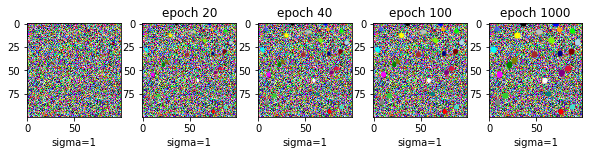

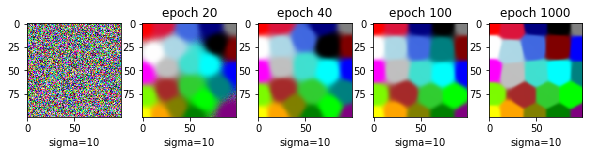

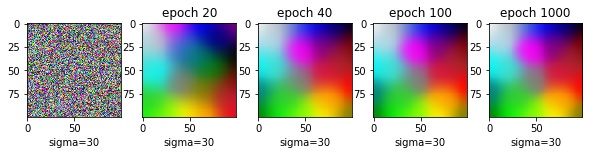

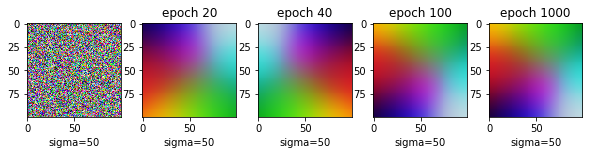

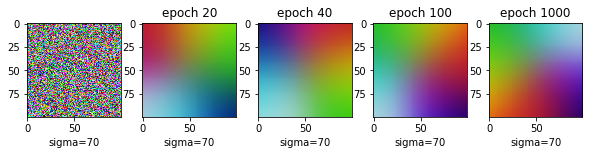

In [2]:
#original grid followed by 20, 40, 100, 1000 epochs.
epoch=[0,20,40,100,1000]
#sigma values of 𝜎 = 1, 10, 30, 50, 70
sigma=[1,10,30,50,70]
columns = 3
rows = 3
#to see the changes for all sigma
for s in sigma:
    weight =np.random.rand(10000,3)
    fig=plt.figure(figsize=(10, 10))
    columns = 5
    rows = 5
#change the epoch from 20 to 1000
    for j in epoch:
        fig.add_subplot(rows, columns, (epoch.index(j)+1))
        for k in range(j):
#use 24 colors as the input sample 
            for h in range(24):
#use sample color to train the weight
                weight1=b[h]-weight
#calculate the distance between sample color and every neuron
                norm=np.linalg.norm(weight1,axis=1)
                index=np.argmin(norm)
#find the winner's coordinate
                x,y=(int(index / 100), index % 100)
#values of signma
                sigma0=s
                sigma=sigma0*np.exp(-k/j)
                dis=np.linalg.norm((ar1-[(x,y)]),axis=1)
#calculate neighbor function
                Nij=np.exp(-(dis**2/2/sigma/sigma))
                alfa=0.8*np.exp(-k/j)
                Nij1=Nij.reshape(-1,1)
#update weight for all neighbors
                weight=weight+alfa*(b[h]-weight)*Nij1
                plt.title('epoch %s'%(j))
        plt.xlabel('sigma=%s'%(s))
        weight=np.array(weight)
        image=weight.reshape((100,100,3))
        plt.imshow(image)
    plt.show()